# 语义分割和数据集

In [1]:
import os
import torch
import torchvision
from torch.utils.data import Dataset
import My_utils

voc_dir = './VOCdevkit/VOC2012'

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

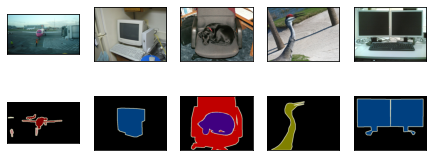

In [2]:
train_features, train_labels = My_utils.read_voc_images(voc_dir)
n = 5
imgs = train_features[:n] + train_labels[:n]
imgs = [img.permute(1, 2, 0) for img in imgs]
My_utils.show_image(imgs, 2, n)

In [3]:
y = My_utils.voc_label_indices(train_labels[0], My_utils.voc_colormap2label())
y[105:115, 130:140]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

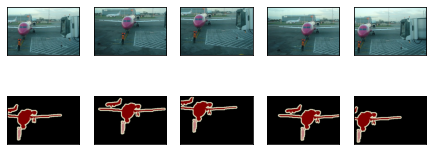

In [4]:
imgs = []
for _ in range(n):
    imgs += My_utils.voc_and_crop(train_features[0], train_labels[0], 200, 300)

imgs = [img.permute(1, 2, 0) for img in imgs]
My_utils.show_image(imgs[::2] + imgs[1::2], 2, n)

In [5]:
crop_size = (320, 480)
voc_train = My_utils.VOCSegDataset(True, crop_size, voc_dir)
voc_test = My_utils.VOCSegDataset(False, crop_size, voc_dir)

read 1114 examples
read 1078 examples
